In [112]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
url = "https://gta.fandom.com/wiki/Vehicles_in_GTA_V"

In [3]:
response = requests.get(url)

In [4]:
soup = BeautifulSoup(response.text,'html.parser')

<!DOCTYPE doctype html>
<html class="" dir="ltr" lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, user-scalable=yes" name="viewport"/>
  <meta content="MediaWiki 1.19.24" name="generator">
   <meta content="GTA Wiki,gtawiki,Vehicles in GTA V,BR8,DR1,PR4,R88,811,Autarch,Adder,Banshee 900R,Bullet,Cheetah" name="keywords">
    <meta content="The following is a list of vehicles that can be controlled in Grand Theft Auto V and Grand Theft Auto Online. Grand Theft Auto V and Online feature 665 separate, controllable vehicles." name="description"/>
    <meta content="summary" name="twitter:card"/>
    <meta content="@getfandom" name="twitter:site"/>
    <meta content="https://gta.fandom.com/wiki/Vehicles_in_GTA_V" name="twitter:url"/>
    <meta content="Vehicles in Grand Theft Auto V and Online | GTA Wiki | Fandom" name="twitter:title"/>
    <meta content="The following is a list of vehicles that can be controlled i
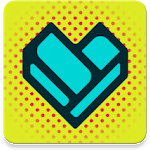
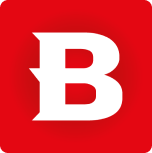

In [5]:
print(soup.prettify())

In [20]:
results = soup.find_all('a', class_="image image-thumbnail link-internal")

In [100]:
results

[<a class="image image-thumbnail link-internal" href="/wiki/BR8" title="BR8"><img alt="BR8-GTAO-front" class="lzy lzyPlcHld" data-image-key="BR8-GTAO-front.png" data-image-name="BR8-GTAO-front.png" data-src="https://vignette.wikia.nocookie.net/gtawiki/images/3/35/BR8-GTAO-front.png/revision/latest/scale-to-width-down/172?cb=20200914093641" height="97" onload="if(typeof ImgLzy==='object'){ImgLzy.load(this)}" src="data:image/gif;base64,R0lGODlhAQABAIABAAAAAP///yH5BAEAAAEALAAAAAABAAEAQAICTAEAOw%3D%3D" width="172"/><noscript><img alt="BR8-GTAO-front" class="" data-image-key="BR8-GTAO-front.png" data-image-name="BR8-GTAO-front.png" height="97" src="https://vignette.wikia.nocookie.net/gtawiki/images/3/35/BR8-GTAO-front.png/revision/latest/scale-to-width-down/172?cb=20200914093641" width="172"/></noscript></a>,
 <a class="image image-thumbnail link-internal" href="/wiki/DR1" title="DR1"><img alt="DR1-GTAO-front" class="lzy lzyPlcHld" data-image-key="DR1-GTAO-front.png" data-image-name="DR1-GT

In [137]:
car_names = []
car_imgs = []
try:
    for result in results:
        car_name = result.parent.find('a')['title']
        car_img = result.find('img')['data-src']
        
        car_img = car_img.replace('172','350').split('?')[0]

        car_names.append(car_name)
        car_imgs.append(car_img)
except:
    print(car_img)

In [138]:
print(len(car_names))
print(len(car_imgs))

689
689


In [139]:
df = pd.DataFrame(car_names,car_imgs)

In [141]:
df.to_csv('car_data.csv')